This dataset contains information about used cars from Car Dekho
This data can be used for a lot of purposes such as price prediction to exemplify the use of linear regression in Machine Learning.
The columns in the given dataset are as follows:

- Car_Name
 
- Year
    
- Selling_price
    
- Present_Price
    
- Km_driven
    
- Fuel_Type
    
- Seller_type
    
- Transmission
    
- Owner

In [82]:
# importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [3]:
# reading the cars data
cars = pd.read_csv("car data.csv")

In [5]:
# displaying the data
cars

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0


## EDA (Exploratory Data Analysis)

In [20]:
# number of rows and columns
cars.shape

(301, 9)

In [6]:
# name of the columns present
cars.columns

Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Kms_Driven',
       'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner'],
      dtype='object')

In [8]:
# checking for missing/null values
cars.isna().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [21]:
# checking for unique classes present in the categorical variables
print(cars.Fuel_Type.unique())
print(cars.Seller_Type.unique())
print(cars.Transmission.unique())
print(cars.Owner.unique())

['Petrol' 'Diesel' 'CNG']
['Dealer' 'Individual']
['Manual' 'Automatic']
[0 1 3]


In [22]:
#stats values for the continuous variables
cars.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [62]:
# storing the required data for model building in df
# dropping the column Car_name since it wont be helpful
df = cars[['Year', 'Selling_Price', 'Present_Price', 'Kms_Driven',
       'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner']]

In [63]:
# Creating a new feature to see how old the car is
#adding current year column
df["Current Year"] = 2021

In [64]:
# checking for the current year column values
df.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Current Year
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,2021
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,2021
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,2021
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,2021
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,2021


In [65]:
# adding new column No.of years
df["No_of_years"] = df["Current Year"] - df["Year"]

In [66]:
df.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Current Year,No_of_years
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,2021,7
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,2021,8
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,2021,4
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,2021,10
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,2021,7


In [67]:
# dropping the Year, Current Year column since it is not useful now
df.drop(["Year","Current Year"],axis=1, inplace=True)

In [68]:
df.head()

,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,No_of_years
0,3.35,5.59,27000,Petrol,Dealer,Manual,0,7
1,4.75,9.54,43000,Diesel,Dealer,Manual,0,8
2,7.25,9.85,6900,Petrol,Dealer,Manual,0,4
3,2.85,4.15,5200,Petrol,Dealer,Manual,0,10
4,4.60,6.87,42450,Diesel,Dealer,Manual,0,7


### Feature transfomation

In [70]:
# converting categorical features to numerical using pandas
# drop_first= T to remove dummy variable trap
df = pd.get_dummies(df, drop_first=True)

In [71]:
# all categorical features converted now. Fuel type CNG is dropped.
df

,Selling_Price,Present_Price,Kms_Driven,Owner,No_of_years,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,3.35,5.59,27000,0,7,0,1,0,1
1,4.75,9.54,43000,0,8,1,0,0,1
2,7.25,9.85,6900,0,4,0,1,0,1
3,2.85,4.15,5200,0,10,0,1,0,1
4,4.60,6.87,42450,0,7,1,0,0,1
...,...,...,...,...,...,...,...,...,...
296,9.50,11.60,33988,0,5,1,0,0,1
297,4.00,5.90,60000,0,6,0,1,0,1
298,3.35,11.00,87934,0,12,0,1,0,1
299,11.50,12.50,9000,0,4,1,0,0,1


In [77]:
# checking correlation among the features and target variable
df.corr()

,Selling_Price,Present_Price,Kms_Driven,Owner,No_of_years,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
Selling_Price,1.000000,0.878983,0.029187,-0.088344,-0.236141,0.552339,-0.540571,-0.550724,-0.367128
Present_Price,0.878983,1.000000,0.203647,0.008057,0.047584,0.473306,-0.465244,-0.512030,-0.348715
Kms_Driven,0.029187,0.203647,1.000000,0.089216,0.524342,0.172515,-0.172874,-0.101419,-0.162510
Owner,-0.088344,0.008057,0.089216,1.000000,0.182104,-0.053469,0.055687,0.124269,-0.050316
No_of_years,-0.236141,0.047584,0.524342,0.182104,1.000000,-0.064315,0.059959,0.039896,-0.000394
Fuel_Type_Diesel,0.552339,0.473306,0.172515,-0.053469,-0.064315,1.000000,-0.979648,-0.350467,-0.098643
Fuel_Type_Petrol,-0.540571,-0.465244,-0.172874,0.055687,0.059959,-0.979648,1.000000,0.358321,0.091013
Seller_Type_Individual,-0.550724,-0.512030,-0.101419,0.124269,0.039896,-0.350467,0.358321,1.000000,0.063240
Transmission_Manual,-0.367128,-0.348715,-0.162510,-0.050316,-0.000394,-0.098643,0.091013,0.063240,1.000000


In [81]:
# seaborn for visualization 
import seaborn as sns

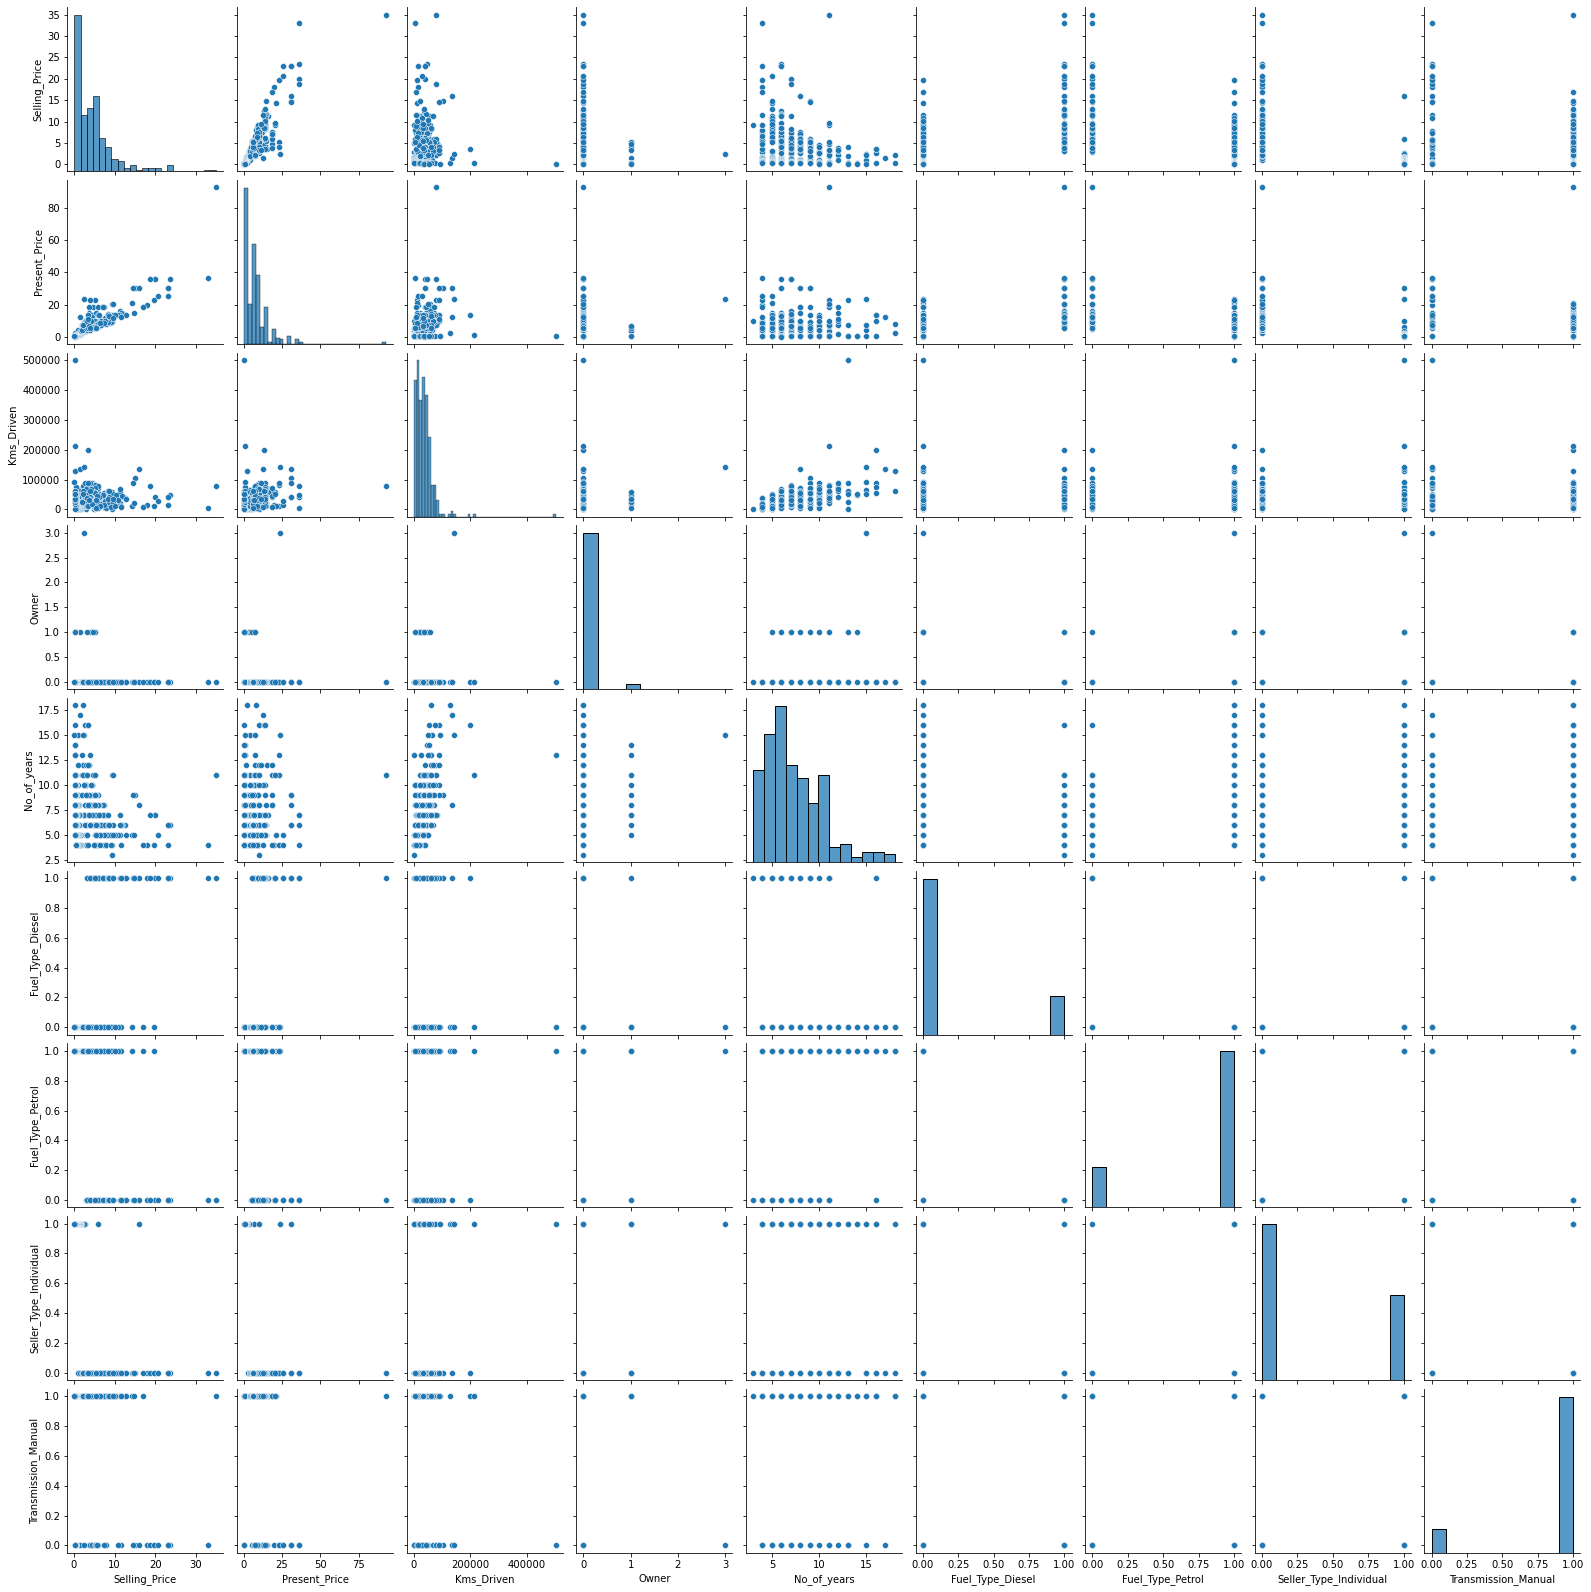

In [79]:
# pair plot for the features
sns.pairplot(df)

<AxesSubplot:>

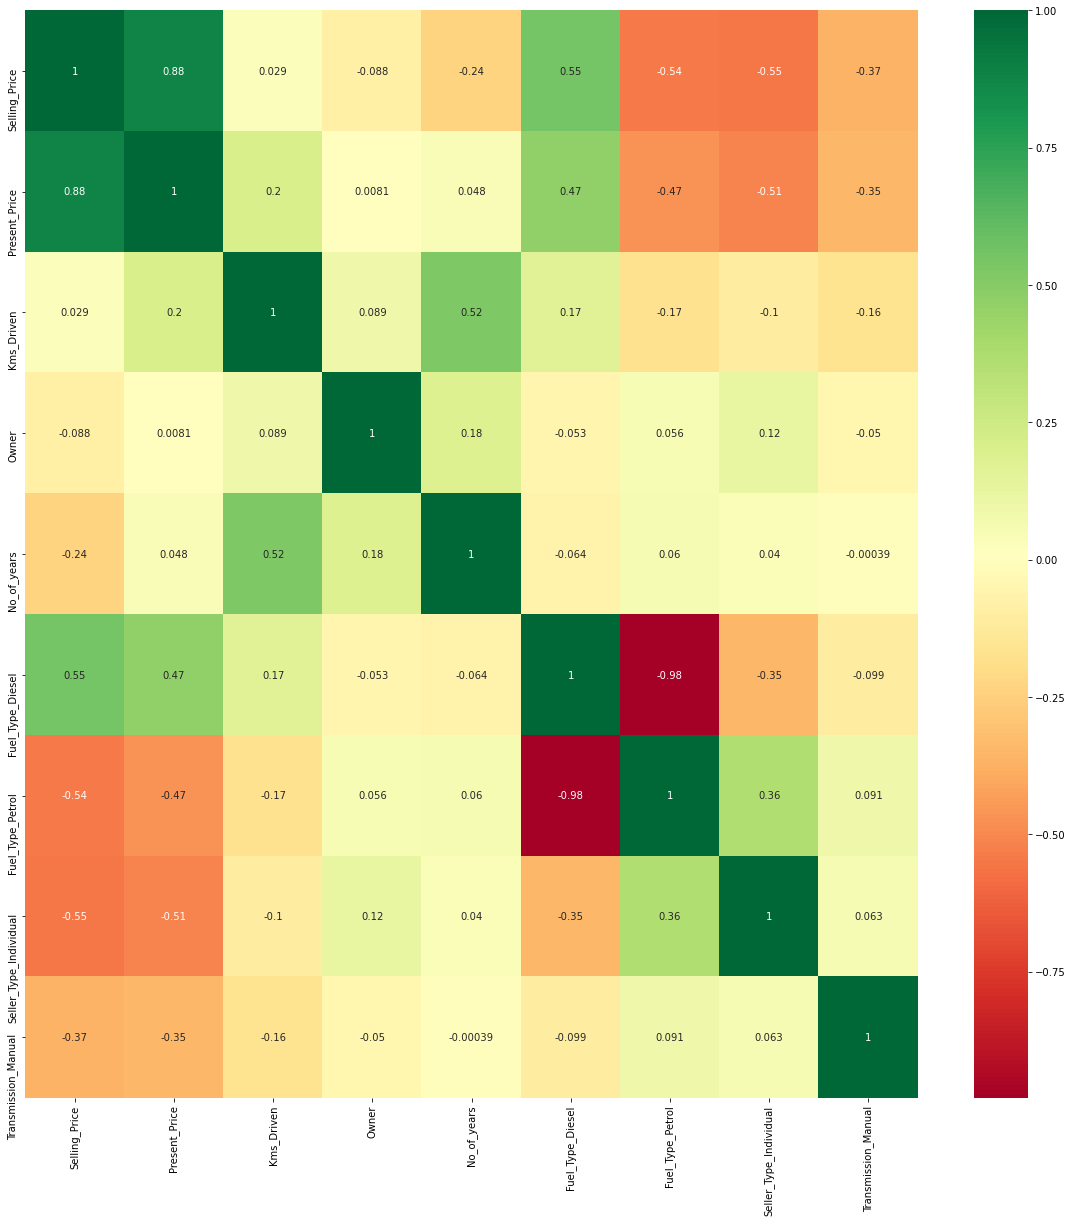

In [86]:
# getting important features
corr_df = df.corr()
top_corr_features = corr_df.index
plt.figure(figsize=(20,20))
# plotting heatmap
sns.heatmap(df[top_corr_features].corr(), annot=True, cmap="RdYlGn")

In [87]:
df.head()

,Selling_Price,Present_Price,Kms_Driven,Owner,No_of_years,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,3.35,5.59,27000,0,7,0,1,0,1
1,4.75,9.54,43000,0,8,1,0,0,1
2,7.25,9.85,6900,0,4,0,1,0,1
3,2.85,4.15,5200,0,10,0,1,0,1
4,4.60,6.87,42450,0,7,1,0,0,1


In [91]:
# splitting into dependent and independent features
X = df.iloc[:,1:]
y = df.iloc[:,0]

In [94]:
y.head()

0    3.35
1    4.75
2    7.25
3    2.85
4    4.60
Name: Selling_Price, dtype: float64

In [95]:
# Feature importance
# Extra tree regressor is used to see which features are important for the target variable
from sklearn.ensemble import ExtraTreesRegressor
model = ExtraTreesRegressor()
model.fit(X,y)

ExtraTreesRegressor()

In [96]:
# displaying feature importance for the independent feature
print(model.feature_importances_)

[0.36628413 0.04187818 0.00040942 0.07591764 0.23129999 0.01470794
 0.12832595 0.14117675]


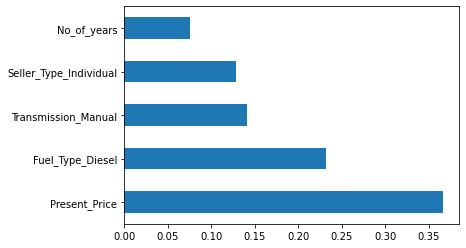

In [99]:
# plot graph of feature importance for better visualization
f_importance = pd.Series(model.feature_importances_, index=X.columns)
# taking top 5 important features and plotting them
f_importance.nlargest(5).plot(kind="barh")
plt.show()

In [104]:
# splitting data into test and train
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

In [105]:
# numbers of rows in train data
X_train.shape

(240, 8)

In [113]:
# using random forest for model
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()

In [108]:
## Hyper-parameters
n_estimators = [int(x) for x in np.linspace(start=100,stop=1000,num=10)]
print(n_estimators)

[100, 200, 300, 400, 500, 600, 700, 800, 900, 1000]


In [109]:
# Using Randomzied search CV over grid search since it is faster
# No.of trees in Random Forest
n_estimators = [int(x) for x in np.linspace(start=100,stop=1000,num=10)]
# No. of featrues to consider at every split
max_features = ['auto','sqrt']
# Maximum number of levels in the tree
max_depth = [int(x) for x in np.linspace(5,30,num=6)]
# Minimum number of samples required to split a node
min_samples_split = [2,5,10,15,100]
# minimum number of samples required at each leaf node
min_samples_leaf = [1,2,5,10]

In [110]:
# importing random search CV
from sklearn.model_selection import RandomizedSearchCV

In [112]:
# creating the random grid
random_grid = {'n_estimators' : n_estimators,
              'max_features' : max_features,
              'max_depth' : max_depth,
              'min_samples_split' : min_samples_split,
              'min_samples_leaf' : min_samples_leaf
              }

print(random_grid)

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000], 'max_features': ['auto', 'sqrt'], 'max_depth': [5, 10, 15, 20, 25, 30], 'min_samples_split': [2, 5, 10, 15, 100], 'min_samples_leaf': [1, 2, 5, 10]}


In [114]:
# using the random grid to search for the best hyper parameters
# n_iter=10, n_jobs=1 means all of the laptop cores will be used i.e processoers
# if verbose not given, result wont be displayed in the next step
rf_random = RandomizedSearchCV(estimator=rf, param_distributions=random_grid, scoring='neg_mean_squared_error', n_iter=10, cv=5, verbose=2, random_state=16, n_jobs=1)

In [115]:
# fitting the random search cv using the above parameters 
rf_random.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=30, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=1000; total time=   2.9s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=1000; total time=   3.1s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=1000; total time=   2.5s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=1000; total time=   2.4s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=1000; total time=   2.5s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=10, min_samples_split=15, n_estimators=200; total time=   0.4s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=10, min_samples_split=15, n_estimators=200; total time=   0.4s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=10, min_samples_split=15, 

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000]},
                   random_state=16, scoring='neg_mean_squared_error',
                   verbose=2)

In [116]:
# predicting the x test values
pred = rf_random.predict(X_test)

In [117]:
pred

array([ 0.53702702,  5.35103239,  1.19140028,  0.18373712,  0.61061267,
        0.73847131, 21.16401323,  8.88490075,  8.82638685,  7.10800556,
        3.04409468,  2.54104425,  4.44066732,  0.44702546, 10.34831598,
        9.60238653,  5.7022155 ,  4.23808135,  0.5844523 ,  0.41476624,
        0.46385534,  4.56008802,  3.79392579,  5.7022155 ,  1.14038887,
        6.00888177,  5.10778889,  3.27473937,  3.0026453 ,  5.94780306,
        1.05540956,  0.47030058,  5.42524275,  0.21485328,  4.85466837,
        0.69876313,  4.97453089, 15.54734502,  4.99164188,  2.98112288,
        0.3294893 ,  2.45333577,  1.21110767,  2.90336687,  0.51409024,
        3.50867381,  9.41936364,  8.18163849, 17.1310295 ,  0.44546238,
        0.64900398,  0.56788278,  5.02944478,  0.45892788,  0.83521101,
        0.31813291,  9.06429167,  2.99233399,  0.76363591, 20.28566433,
        7.31727108])

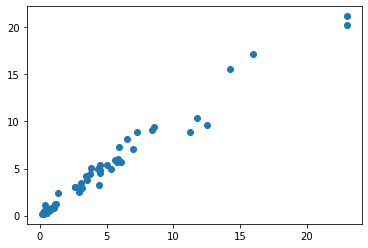

In [119]:
# checking how the prediction value stands against y_test values
# linearity observed means prediction done is pretty good
plt.scatter(y_test, pred)